# Doğrusal olmayan ayrılabilir veri için SVM Sınıflandırıcısı

In [1]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. "XOR" veri setimizi oluşturalım

Bu tür doğrusal olmayan ayrılabilir bir veri setini sınıflandırmayı deneyelim

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/05-Model-Tuning/non-linear-dataset.png" width=450>

Bu amaçla, [mantıksal XOR kapıları](https://en.wikipedia.org/wiki/XOR_gate) kullanarak 2D bir veri seti oluşturacağız

Aşağıdaki hücrelerde `np.logical_xor` ile oynayarak bunun nasıl çalıştığını anlamaya çalışın:

In [2]:
print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))

False
True
False


In [3]:
np.logical_xor([True, True, False], [True, False, False])

array([False,  True, False])

Şimdi aşağıdaki kurala sahip sentetik 2D veri setimizi oluşturalım: 

$$ y = 
\begin{cases}
    1 & \text{eğer } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{aksi durumda}
\end{cases}
$$


In [4]:
# Number of datapoints
n = 500
noise = 0.2

Text(0, 0.5, 'X2')

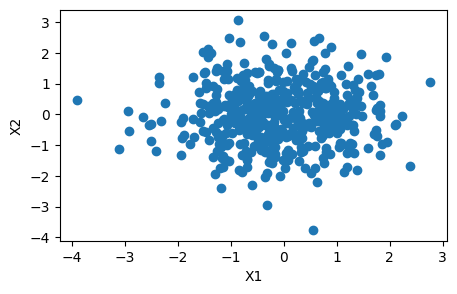

In [5]:
rng = np.random.default_rng(0)
X = rng.standard_normal((n, 2))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")


In [6]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


In [7]:
# Then, build our binary class y
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise"

epsilon = noise * rng.standard_normal(n)

y_bool = np.logical_xor(
    x1 > epsilon,
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)

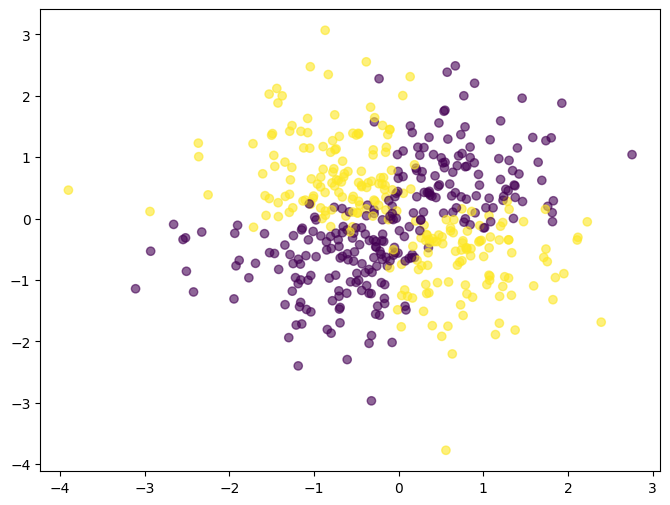

In [8]:
# We have re-created the XOR quadrant!
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

## 2 - Doğrusal SVM

_Destek Vektör Makinesi (SVM)_'ne hoş geldiniz 🎉

Doğrusal SVM sınıflandırıcısının amacı en iyi **w** vektörünü bulmaktır

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/05-Model-Tuning/hyperplane.png" width=500>

- yönü karar sınırı hiperplanını benzersiz bir şekilde belirler
- ve aykiri değerler için mentepe kayiplarinin toplamini minimize eder

👉 **w** `.fit()` sırasında öğrenilen tüm model parametrelerini içerir  
👉 `C` **yanlış** sınıflandırma ile ilişkili **maliyet**tir

___
❓ Tüm veri seti üzerinde `C` = 1 değeri ile **doğrusal** SVC sınıflandırıcısı eğitin. 

In [9]:
from sklearn.svm import SVC

linear_svm = SVC(kernel="linear", C=1)
linear_svm.fit(X, y);

❓ `utils/plots.py` içinde size verilen `plot_decision_regions` fonksiyonunu kullanarak modelinizin karar sınırlarını görselleştirin

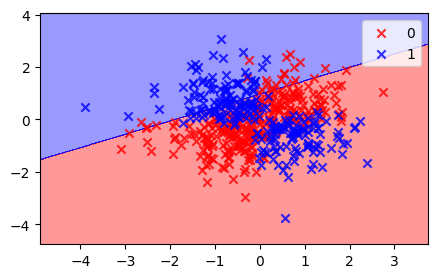

In [10]:
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, classifier=linear_svm)

❓ Bu model için "tahmin ettiğiniz" doğruluk skorunu (yaklaşık olarak) aşağıya kaydedin 

In [11]:
linear_svm_score = 0.55

# C burada pratikte sonucu çok değiştirmez; çünkü XOR veri seti doğrusal olarak ayrılabilir değildir.
# Linear kernel her koşulda düz bir karar sınırı öğrenir; problem model kapasitesi/uygunsuz model seçimi.

❓ Bu durumda `C` değerinin herhangi bir önemi olduğunu düşünüyor musunuz?

<details><summary>Cevap</summary>
    
☝️ Doğrusal SVM sınıflandırıcıları, yanlış sınıflandırılan veri noktalarına uygulanan maliyet `c` ne olursa olsun, veri noktalarını her zaman düz bir çizgi ile ayırır. Veri setine yapısal olarak yanlış model tipini uydurmaya çalışıyoruz.

</details>

**Cevap**

Hayır, bu durumda C değerinin pratikte bir önemi yoktur.  
Çünkü doğrusal SVM, C ne kadar değiştirilirse değiştirilsin karar sınırını düz bir çizgi olarak öğrenir.  
XOR veri seti yapısal olarak doğrusal ayrılabilir olmadığı için problem model kapasitesinden kaynaklanır.

❓ Lojistik Regresyon daha iyi performans gösterir mi düşünüyorsunuz? Denemekten çekinmeyin.

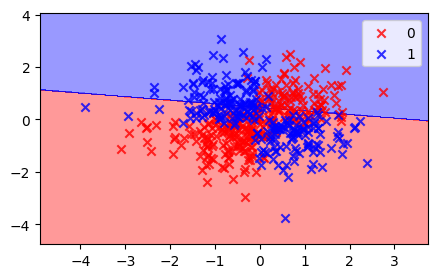

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

plot_decision_regions(X, y, classifier=log_reg)

🧪 Kodunuzu test edin

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('linear_svm',
    linear_svm_score=linear_svm_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D5-S-data-svm/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_linear_svm.py::TestLinearSvm::test_score PASSED                     [100%]

============================== 1 passed in 0.00s ===============================


💯 You can commit your code:

git add tests/linear_svm.pickle

git commit -m 'Completed linear_svm step'

git push origin master



## 3. Çekirdek SVM 🔥

📚 İlk olarak, **bugünkü dersin 5. bölümünü (Çekirdekler) dikkatle okuyun**. Acele etmeyin, bu zorluk görevinin bir parçasıdır

❓Kendi kelimelerinizle, Çekirdek nedir - bir cümle ile?

<details>
    <summary>Olası bir cevap</summary>

SVM modellerinde sınıflandırma için kullanılan noktalar arasındaki "benzerlik" ölçüsüdür (yüksek benzerliğe sahip iki nokta benzer şekilde sınıflandırılır)
</details>

### Çekirdek (kernel), SVM’in verileri daha yüksek boyutta “ayırabilir” hâle getirmek için noktalar arasındaki benzerliği ölçen fonksiyondur.

❓Aşağıda 4 farklı çekirdeği isimlerini belirtin

<details>
    <summary>Olası bir cevap</summary>

- Doğrusal (Linear)
- Polinom (Polynomial)
- Radyal Taban Fonksiyonu (rbf)
- Sigmoid
</details>

### Linear, Polynomial, RBF (Gaussian), Sigmoid

## 3.2 Polinom Çekirdekleri

2. derece polinom çekirdeği aşağıdaki gibidir 
    $$K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^2$$

Çekirdeği değiştirerek, _benzerlik_ kavramımızı değiştirdik: doğrusal çekirdek için nokta çarpımı ("kosinüs benzerliği") ile noktaların ne kadar yakın olduğunu ölçmek yerine, **noktaların birbirine göre bir daire içinde olup olmadığına** dayalı benzerlik ölçüyoruz. 

Bu, aşağıdaki gibi yeni karesel özelliklerin oluşturulmasına **eşdeğer**dir (Çekirdek Hileşi)
    $$\phi(x) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ x_2 x_1 \\ x_2^2 \\  \sqrt{2c} \ x_1 \\ \sqrt{2c} \ x_2\end{bmatrix}$$

❓ Sezgisel olarak konuşarak, XOR veri setimizi en iyi şekilde uydurmak için ihtiyaç duyduğumuz minimum çekirdek "derece" sayısı `d` kaçtır? 

<details>
    <summary>Cevap</summary>

`d=2` yeterli olmalıdır çünkü XOR koşulumuz `x1 * x2` polinomundan hesaplanabilir
    
$$    
    sınıf = 
\begin{cases}
    0 & \text{eğer } x_1 x_2 > 0\\
    1 & \text{aksi durumda}
\end{cases}
$$
</details>


❓ "Maksimum marğ sınıflandırıcısı"nı görselleştirmek için `C = 100` değerini yeterince büyük tutarak, 2. derece SVM `poly` eğitin ve çizin

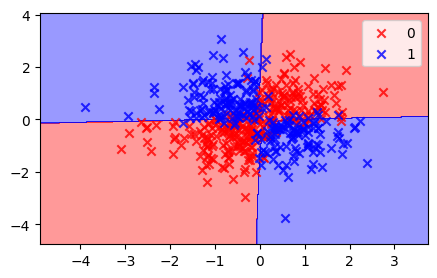

In [14]:
from sklearn.svm import SVC

poly_svm = SVC(kernel="poly", degree=2, C=100)
poly_svm.fit(X, y)

plot_decision_regions(X, y, classifier=poly_svm)

❓ Bu XOR veri setinin nasıl tasarlandığını bildiğiniz göz önüne alınarak, svm'inizin performansını en iyi hangi sıfatlar tanımlar?

In [15]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = [
    "captures all reducible error",
    "has only irreducible errors left",
]


🧪 Kodunuzu test edin

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('poly_svm',
    poly_svm_performance=poly_svm_performance)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D5-S-data-svm/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_poly_svm.py::TestPolySvm::test_performance PASSED                   [100%]

============================== 1 passed in 0.00s ===============================


💯 You can commit your code:

git add tests/poly_svm.pickle

git commit -m 'Completed poly_svm step'

git push origin master



❓ Hala ikna olmadınız mı? Aşağıdaki modeli eğiterek polinom çekirdeğinin polinom özelliklerine sahip olmakla eşdeğer olduğunu iki kez kontrol edebilirsiniz:

- İlk adım olarak polinom özellikleri oluşturuyoruz (özellik mühendisliği)
- ve ardından doğrusal bir SVM eğitiyoruz.

(Pipeline'ların sözdizimi konusunda endişelenmeyin, pipeline'lar hakkında bir sonraki derste daha fazlasını göreceğiz! 🔥)

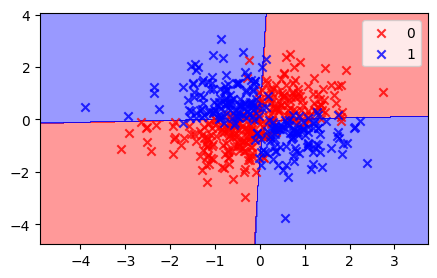

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

# Choose your degree
degree = 2

equivalent_polynomial_model = make_pipeline(
    PolynomialFeatures(degree=degree),
    SVC(kernel="linear", C=100)
)

equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

☝️ Matematiksel olarak eşdeğer olmasına rağmen, bu manuel özellik mühendisliği çekirdek hilesin’den çok daha fazla hesaplama gücü gerektirir ve daha yüksek boyutlulukla ölçeklenmez!

### Aylar veri seti

Şimdi sınıflandırması daha zor bir veri seti ile deneyelim!

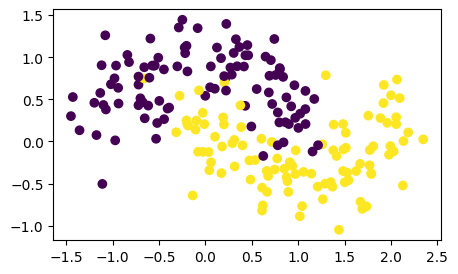

In [18]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Bu veri setine bir polinom SVM çekirdeği uydurmayı deneyin 

`C`, `degree` ve `coef0` değerlerini değiştirerek aşağıda **görsel olarak** deneyin.

`coef0`, $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$ formülünde $c$'nin rolünü oynar
- 0'a eşit olduğunda, sadece d-inci derece polinom özelliklerine erişiminiz vardır
- Ne kadar yüksekse, modeliniz o kadar çok düşük derece özellikleri dikkate alır

In [19]:
from ipywidgets import interact # pip install ipywidgets if you haven't done it already

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

☝️ Polinom çekirdeği, derece yeterince yüksek olduğu sürece hemen hemen her şeyi uydurabili r.  

Ancak, çok yüksek dereceli polinom çekirdeklerinin modelleri aşırı öğrenmeye eğilimli hale getireceğini unutmayın!


## 3.3 RBF - Radyal Taban Fonksiyonu Çekirdeği (gaussian olarak da bilinir)

RBF Çekirdeği geliyor! 
SVM için hemen hemen vazgeçilmez çekirdek (ve sklearn'de varsayılan olan).   

Çeşitli problemlere karşı çok sağlam olduğunu kanıtlar ve polinomdan daha kolay ayarlanır, çünkü sadece çekirdek hiper-parametresi `gamma` $\gamma$'nın grid arama yapmayı gerektirir, tabii ki `C`'nin üstünde

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- İki nokta arasındaki öklidyen mesafe ne kadar büyük olursa $||\textbf{a}-\textbf{b}||^2$, çekirdek fonksiyonu sıfıra o kadar yakın olur. Bu, birbirinden uzak iki noktanın farklı olma olasılığının daha yüksek olduğu anlamına gelir.

- `gamma` $\gamma$ her bir örneğin diğerleri üzerindeki etki aralığını azaltır (**miyopi**). Daha güçlü $\gamma$ değerleri, modelinizi küçük ölçekli düzensizliklere "fazla yakından" bakarak aşırı öğrenmeye sevk eder

- `C` hala marğın **sertliğini** kontrol eder. Daha güçlü değerler modelinizi aşırı öğrenmeye sevk eder.

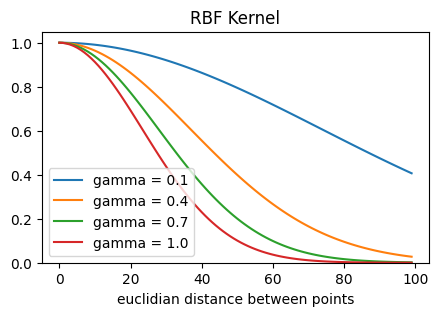

In [20]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

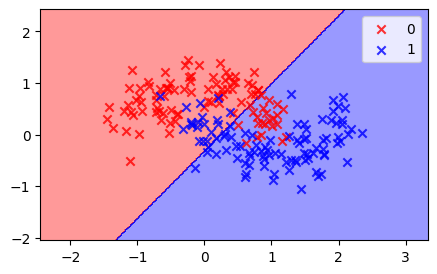

In [21]:
from sklearn.svm import SVC

rbf_svm_low_var = SVC(kernel="rbf", gamma=0.01, C=0.1)
rbf_svm_low_var.fit(X, y)

plot_decision_regions(X, y, classifier=rbf_svm_low_var)

❓ RBF çekirdeği ile SVM sınıflandırıcısını eğitin ve karar bölgelerini çizin

- Çok düşük varyansli bir model ile başlayın (örn: `gamma=0.01` ve `C=0.1`)
- Açık aşırı öğrenme gözlemleyene kadar `gamma`yı artırın. Grafikte açıkça görülebilir olmalıdır. 

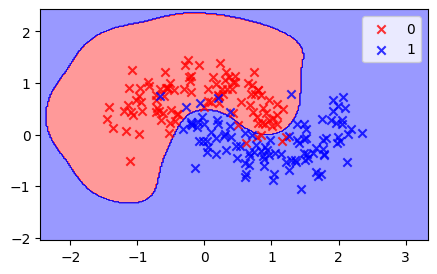

In [22]:
rbf_svm_high_gamma = SVC(kernel="rbf", gamma=5, C=0.1)
rbf_svm_high_gamma.fit(X, y)

plot_decision_regions(X, y, classifier=rbf_svm_high_gamma)

❓ Şimdi, gamma'nın en iyi tahmin ettiğiniz değerini kullanın (örneğin `gamma=1`) ve bu sefer aşırı öğrenene kadar `C`'yi artırın


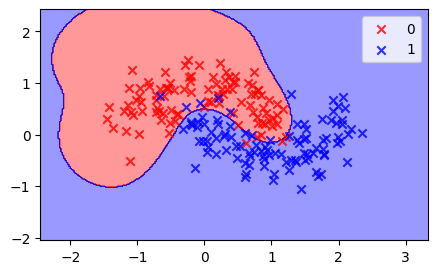

In [23]:
rbf_svm_high_c = SVC(kernel="rbf", gamma=1, C=100)
rbf_svm_high_c.fit(X, y)

plot_decision_regions(X, y, classifier=rbf_svm_high_c)

☝️ Yukarıdaki gibi `@interact` kullanarak kendi interaktif grafiğinizi oluşturmaktan çekinmeyin ve en iyi `C` ve `gamma`yı "görsel olarak" bulmaya çalışın

❓ `C` ve `gamma` için en iyi görsel tahmin değerlerinizi aşağıda saklayın (onluk kuvvetlerine yuvarlanmış: 0.1, 1, 10, 100 ...)

In [24]:
best_gamma = 1
best_c = 10

🧪 Kodunuzu test edin

In [25]:
from nbresult import ChallengeResult
result = ChallengeResult('rbf_svm',
                         best_c=best_c,
                         best_gamma=best_gamma)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D5-S-data-svm/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_rbf_svm.py::TestRbfSvm::test_hyperparams PASSED                     [100%]

============================== 1 passed in 0.00s ===============================


💯 You can commit your code:

git add tests/rbf_svm.pickle

git commit -m 'Completed rbf_svm step'

git push origin master



## 3.4 Sigmoid çekirdeği

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

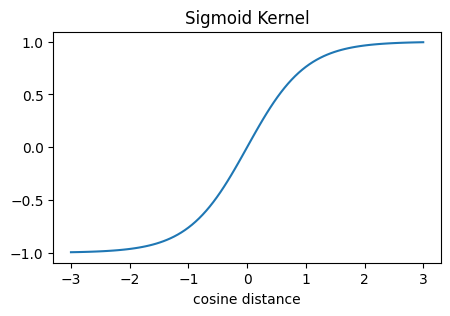

In [26]:
# The "tangent hyperbolic" function resembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ Sigmoid çekirdeği, doğrusal çekirdekte kullanılan "kosinüs benzerliği"ni [-$\gamma$,+$\gamma$] aralığına sıkıştırır.

❓ Sigmoid çekirdeği ile modelinizi **görsel olarak** ince ayar yapmaya çalışın, şunlar için kaba tan eli arama yapın
- `C=[0.1, 1, 10, 100, 1000, 10000]` 
- `gamma = [0.001, 0.01, 0.1, 1, 10]`  

`@interact` dekoratörünü `plot_decision_regions` fonksiyonu ile birlikte kullanarak

In [27]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), …

☝️ Görsel olarak çalıştırmak kolay değil, değil mi? Otomatik GridSearch zamanı!

## 4. En iyi çekirdeği Grid Search ile bulun

❓ En iyi `kernel` ve en iyi çekirdek hiper-parametreleri için aynı anda `RandomizedSearchCV` yapın (uyarı: scikit-learn polinom çekirdeklerini diğerleriyle aynı anda grid araması yaparken sorun yaşar)
 
Denemek için mantıklı değer aralıkları tanımlamak için yukarıdaki görsel sezgilerinizi kullanın

In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "C": [0.1, 1, 10, 100, 1000, 10000],
    "gamma": [0.001, 0.01, 0.1, 1, 10],
    "coef0": [-5, -1, 0, 1, 5, 10]
}

svc = SVC(kernel="sigmoid")

search = RandomizedSearchCV(
    SVC(kernel="sigmoid"),
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

search.fit(X, y)
best_svm = search.best_estimator_

❓ En iyi modelinizin karar sınırlarını çizin

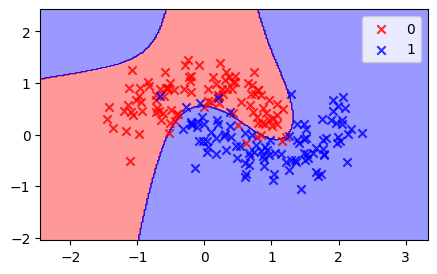

In [29]:
plot_decision_regions(X, y, classifier=best_svm)

❓ Doğruluğunu 5 katlı çapraz doğrulama ile değerlendirin ve ortalama sonuçunuzu `best_svm_cv_accuracy` olarak saklayın

In [30]:
best_svm_cv_accuracy = search.best_score_

In [31]:
result = ChallengeResult(
    'sigmoid_svm',
    best_svm_cv_accuracy=best_svm_cv_accuracy
)

🧪 Kodunuzu test edin

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('sigmoid_svm',
    best_svm_cv_accuracy=best_svm_cv_accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D5-S-data-svm/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_sigmoid_svm.py::TestSigmoidSvm::test_accuracy PASSED                [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/sigmoid_svm.pickle

git commit -m 'Completed sigmoid_svm step'

git push origin master



## 5. Genelleme

❓ Buluttaki uygulamada "produksiyon"a koymak için `best_svm` modelinizi seçin. Yarım ay veri setine uydurun.

In [33]:
# best_svm zaten search.best_estimator_ olarak elinde olmalı
best_svm = search.best_estimator_

# güvenli olsun diye (bazı senaryolarda) tekrar fit edelim
best_svm.fit(X, y)

SVC(C=10000, coef0=-5, gamma=1, kernel='sigmoid')

Birkaç gün sonra, model daha önce hiç görmediği yeni veri noktalarını aldı ve tahmin etti (bizim "test setimiz")

In [34]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

❓ `test_idx`'i isteğe bağlı argüman olarak içeren `plot_decision_regions` yaparak performansını görselleştirin.  
Kaç tane yanlış sınıflandırılmış test örneği aldığınızı sayın!

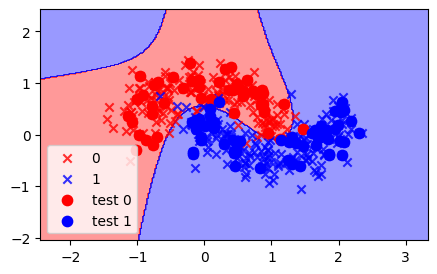

In [35]:
from utils.plots import plot_decision_regions
import numpy as np

# Karar sınırlarını çiz (test noktaları ayrı işaretlensin diye test_idx veriyoruz)
plot_decision_regions(X_full, y_full, classifier=best_svm, test_idx=test_idx)

# Test hatası sayısı
y_pred_test = best_svm.predict(X_test)
number_misclassified_test = int(np.sum(y_pred_test != y_test))

In [36]:
### number_misclassified_test = None

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('generalization',
    number_misclassified_test=number_misclassified_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D5-S-data-svm/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_generalization.py::TestGeneralization::test_number_misclassified PASSED [100%]

============================== 1 passed in 0.00s ===============================


💯 You can commit your code:

git add tests/generalization.pickle

git commit -m 'Completed generalization step'

git push origin master



## 6. kNN vs. SVM ?

Böyle doğrusal olmayan bir problem KNN sınıflandırıcısına da iyi uyabilir.
En iyi K'yı görsel olarak bulmaya çalışın ve davranışını SVM ile karşılaştırın.

KNN CV accuracies:
  k= 1 -> 0.915
  k= 3 -> 0.920
  k= 5 -> 0.915
  k= 7 -> 0.920
  k= 9 -> 0.920
  k=15 -> 0.930
  k=25 -> 0.935
  k=35 -> 0.935
  k=51 -> 0.890

Best k = 25 (CV acc = 0.935)


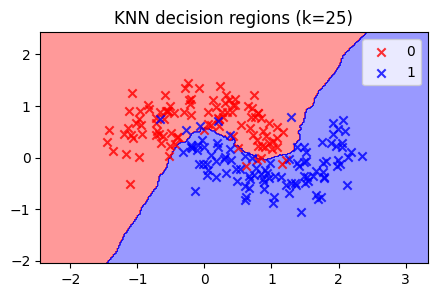


--- Comparison ---
KNN best CV acc: 0.935 (k=25)
SVM best CV acc: 0.925 (from your search)


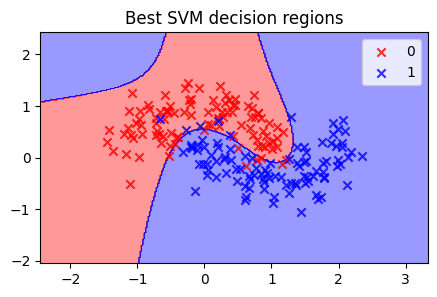

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Eğer notebook'ta zaten varsa tekrar import sorun değil:
from utils.plots import plot_decision_regions

# 1) Aday K değerleri (görsel denemeye uygun)
k_list = [1, 3, 5, 7, 9, 15, 25, 35, 51]

# 2) Her K için 5-fold CV accuracy (sayısal destek)
cv_scores = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores[k] = cross_val_score(knn, X, y, cv=5, scoring="accuracy").mean()

best_k = max(cv_scores, key=cv_scores.get)
best_knn_cv = cv_scores[best_k]

print("KNN CV accuracies:")
for k in k_list:
    print(f"  k={k:>2} -> {cv_scores[k]:.3f}")
print(f"\nBest k = {best_k} (CV acc = {best_knn_cv:.3f})")

# 3) En iyi KNN'i fit et ve karar sınırını çiz
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X, y)

plt.figure()
plot_decision_regions(X, y, classifier=best_knn)
plt.title(f"KNN decision regions (k={best_k})")
plt.show()

# 4) SVM ile basit karşılaştırma (best_svm notebook’ta zaten var olmalı)
# Eğer best_svm tanımlı değilse, üstteki SVM GridSearch hücrelerini çalıştır.
svm_cv_hint = None
try:
    svm_cv_hint = best_svm_cv_accuracy
except NameError:
    svm_cv_hint = None

print("\n--- Comparison ---")
print(f"KNN best CV acc: {best_knn_cv:.3f} (k={best_k})")
if svm_cv_hint is not None:
    print(f"SVM best CV acc: {svm_cv_hint:.3f} (from your search)")
else:
    print("SVM best CV acc: (not found) -> make sure you ran the SVM search cell that defines best_svm_cv_accuracy")

# 5) SVM karar sınırı (varsa) görsel kıyas
try:
    plt.figure()
    plot_decision_regions(X, y, classifier=best_svm)
    plt.title("Best SVM decision regions")
    plt.show()
except NameError:
    print("best_svm not found. Run the SVM search cell to create best_svm, then rerun this cell.")

🏁 Tebrikler! Notebook'unuzu **commit** ve **push** etmeyi unutmayın

# SVM Kernels (Çekirdekler) – Notebook Proje Özeti & Yorumlar

Bu notebook’ta hedefimiz, **SVM’in doğrusal olmayan problemleri “çekirdek (kernel) hilesi” ile nasıl çözebildiğini** sezgisel + görsel şekilde görmekti. Bunun için önce XOR gibi klasik doğrusal ayrılamayan bir problemde **polinom çekirdeği** ile çözüm ürettik; ardından daha gerçekçi bir doğrusal olmayan veri seti olan **make_moons (yarım aylar)** üzerinde **RBF** ve **sigmoid** çekirdeklerini deneyip, en iyi ayarları **RandomizedSearchCV** ile aradık. Son olarak da aynı veri setinde **KNN vs SVM** karşılaştırması yaparak genelleme davranışlarını kıyasladık.

---

## 1) Çekirdek (Kernel) nedir? (Sezgi)

SVM’de çekirdek, iki nokta arasındaki **benzerliği** ölçen bir fonksiyondur.  
Temel fikir şudur:

- Doğrusal SVM, orijinal uzayda “düz bir çizgi/hiperdüzlem” ile ayırmaya çalışır.
- Veri doğrusal ayrılamıyorsa, çekirdek sayesinde veri **daha yüksek boyutlu bir uzaya taşınmış gibi** davranır.
- Böylece yüksek boyutta doğrusal olan ayrım, orijinal uzayda **kıvrımlı (non-linear)** karar sınırına dönüşür.

Bu dönüşümü açık açık “yeni feature üretmekle” yapmak yerine, çekirdek hilesi ile **hesaplamayı doğrudan benzerlik üzerinden** yaparız.

---

## 2) SVM’de kullanılan temel çekirdek türleri

Bu notebook’ta 4 ana çekirdek üzerinden ilerledik:

1. **Linear (Doğrusal)**  
   - Basit, hızlı, yüksek boyutta güçlü.
   - Veri doğrusal değilse yetersiz kalır.

2. **Polynomial (Polinom)**  
   - Karar sınırını polinom derecesiyle kıvırır.  
   - `degree` arttıkça model karmaşıklığı artar.

3. **RBF (Radial Basis Function / Gaussian)**  
   - En yaygın güçlü çekirdek.
   - Yerel benzerlik üzerinden çok esnek sınırlar çizer.
   - `gamma` ile etki alanını, `C` ile marj sertliğini ayarlarız.

4. **Sigmoid**  
   - `tanh` benzeri bir davranış.
   - Bazı veri setlerinde iyi çalışır ama RBF kadar “default güçlü” değildir.
   - `gamma`, `coef0`, `C` hassas ayarlanır.

---

## 3) XOR problemi ve Polinom çekirdeği (Non-linear ayrım)

### 3.1 Neden XOR doğrusal ayrılamaz?
XOR’da sınıflar çapraz şekilde yerleştiği için tek bir doğru ile ayırmak mümkün değildir.  
Bu yüzden doğrusal SVM “underfit” kalır.

### 3.2 Minimum polinom derecesi (degree)
XOR’u yakalamak için en az **2. derece** etkileşim terimine (örn. `x1 * x2`) ihtiyaç duyarız.  
Bu yüzden **degree=2** polinom çekirdeği XOR için yeterli hale gelir.

### 3.3 “Çekirdek = Feature Engineering” eşdeğerliği
Notebook’ta ayrıca şunu doğruladık:

- `PolynomialFeatures(degree=d)` + `Linear SVM`
yaklaşımı, matematiksel olarak polinom çekirdeğine denk davranabilir.

Fakat pratikte:
- Bu “manuel feature engineering” yaklaşımı yüksek boyutta **çok pahalı** olabilir.
- Çekirdek hilesi çoğu durumda daha ölçeklenebilir ve pratiktir.

---

## 4) Yarım Aylar (make_moons) – Daha gerçekçi bir non-linear problem

Bu aşamada, doğrusal olmayan karar sınırlarını gerçekten görmek için `make_moons` veri setine geçtik.

### 4.1 Polinom çekirdeğiyle denemeler
- `degree`, `C`, `coef0` ile karar sınırı dramatik şekilde değişti.
- Degree arttıkça model “daha kıvrımlı” sınırlara gidebilir ama **overfit riski** artar.

### 4.2 RBF çekirdeğiyle denemeler (Bias-Variance sezgisi)
RBF’de iki kritik knob var:

- **gamma**: “yakın görüşlülük / myopia”
  - gamma küçükse: her nokta geniş etki alanına sahip → sınır daha düz → **yüksek bias / düşük varyans**
  - gamma büyükse: etki alanı daralır → sınır çok kıvrılır → **düşük bias / yüksek varyans (overfit)**

- **C**: marj sertliği
  - C küçükse: hata tolere edilir → daha yumuşak sınır → daha fazla bias
  - C büyükse: hata tolere edilmez → veri daha sıkı takip edilir → daha fazla varyans

Notebook’ta önce **düşük gamma + düşük C** ile “underfit” bir model gördük, sonra gamma’yı artırarak kıvrımı yükselttik; ardından iyi bir gamma seçip C’yi büyüterek overfit sınırlarına yaklaşımı gözlemledik.

---

## 5) Sigmoid çekirdeği ve otomatik arama (RandomizedSearchCV)

Sigmoid çekirdeğinde görsel tuning genelde daha zordur; çünkü uygun aralıklar hassastır.  
Bu yüzden notebook’ta:

- `C`, `gamma`, `coef0` için mantıklı aday setleri tanımlayıp
- **RandomizedSearchCV (cv=5)** ile en iyi kombinasyonu aradık.

Amaç:
- manuel denemeyi azaltmak
- daha sistematik şekilde en iyi parametreleri bulmak

Başarılı kriter:
- `best_svm_cv_accuracy >= 0.9` gibi bir eşik hedefi

Bu aramayla bulunan en iyi `best_svm` için karar sınırını çizdik ve çapraz doğrulama skorunu kaydettik.

---

## 6) Genelleme (Generalization) testi: “yeni gün” senaryosu

Burada yaptığımız şey tam bir “mini production” simülasyonuydu:

1. Eğitilmiş en iyi modeli (`best_svm`) seçtik.
2. Modelin hiç görmediği yeni bir test seti ürettik:
   - `X_test, y_test = make_moons(..., random_state=1)`
3. Train + test’i birleştirdik (`X_full`, `y_full`) ve test indekslerini ayrı tuttuk (`test_idx`).
4. `plot_decision_regions(..., test_idx=test_idx)` ile:
   - test noktaları ayrı işaretlendi
   - modelin yeni noktalarda nerede hata yaptığını görsel olarak gördük
5. Test hatasını saydık:
   - `number_misclassified_test = sum(best_svm.predict(X_test) != y_test)`

Bu bölümün amacı:
- “CV iyi” olsa bile, **gerçek yeni örneklerde** modelin nasıl davrandığını görmekti.
- Genelleme hatası, gerçek dünyada en kritik metriktir.

---

## 7) KNN vs SVM karşılaştırması (Aynı veri setinde)

Son bölümde aynı moons veri setinde KNN’i denedik ve **en iyi k** değerini 5-fold CV ile seçtik.

Elde edilen örnek sonuç:
- **KNN best CV acc ≈ 0.935 (k=25)**
- **SVM best CV acc ≈ 0.925**

Yorum:
- Bu veri setinde KNN, uygun k seçilince çok güçlü çıkabilir.
- KNN, “yerel” komşuluk ilişkileriyle karar verir; sınırlar genelde **daha parçalı** olabilir.
- SVM (özellikle RBF) çoğu zaman daha **pürüzsüz** sınırlar üretir ve ayarları iyi seçilince oldukça güçlü geneller.

Bu sonuç şunu öğretir:
> Tek bir model “her zaman en iyi” değildir. Veri geometrisi + gürültü düzeyi + hiperparametre seçimi sonucu değiştirir.

---

## 8) Büyük resim: Bu notebook bize ne kazandırdı?

Bu notebook sonunda şunları netleştirdik:

- Doğrusal ayrılamayan problemler için SVM’in gücü çekirdeklerden gelir.
- Polinom çekirdeği XOR gibi yapısal ilişkileri yakalayabilir (degree=2 kritik örnek).
- RBF çekirdeği genelde güçlü bir default’tur; fakat `gamma` ve `C` dikkat ister.
- Sigmoid çekirdeği denenebilir ama çoğu zaman otomatik arama daha mantıklıdır.
- CV skoru tek başına yetmez: **genelleme testi** (yeni veri) her zaman kritik.
- KNN gibi basit yöntemler bile uygun ayarla SVM’i geçebilir; kıyas şarttır.

---

## 9) Kapanış (Mini sonuç)

Bu çalışma, SVM’i “sadece bir sklearn modeli” değil, **geometri + benzerlik + genelleme** perspektifiyle anlamamızı sağladı.  
Kernel seçimi ve hiperparametreler aslında modelin dünyaya hangi gözlükle baktığını belirliyor:  
kimi zaman geniş açı (düşük gamma), kimi zaman mikroskop (yüksek gamma).  
En iyi model, veri setinin doğasına ve genelleme performansına göre seçilmelidir.